In [1]:
#A1

import math

class Neuron:
  def __init__(self, x_arr, w_arr, bias):
      self.x_arr = x_arr
      self.w_arr = w_arr
      self.bias = bias

  def sigmoid(self, x):
    return 1 / (1 + math.exp(-x))

  def neuron(self) -> float:
      x_arr = self.x_arr
      w_arr = self.w_arr

      z = 0

      for i in range(len(x_arr)):
          z += x_arr[i] * w_arr[i]

      z += self.bias

      res = self.sigmoid(z)

      return res

neuron = Neuron(x_arr=[0.1, 0.2, 0.3, 0.4, 0.5], w_arr=[0.1, 0.2, 0.3, 0.4, 0.5], bias=0.1)
print(neuron.neuron())


0.6570104626734988


In [2]:
#A2

import numpy as np

class Neuron:
  def __init__(self, x_arr, w_arr, bias):
      self.x_arr = x_arr
      self.w_arr = w_arr
      self.bias = bias

  def sigmoid(self, x):
    return 1 / (1 + math.exp(-x))

  def neuron(self) -> float:
      x_arr = self.x_arr
      w_arr = self.w_arr

      z = 0
      z += np.dot(x_arr, w_arr) + self.bias

      res = self.sigmoid(z)

      return res

neuron = Neuron(x_arr=[0.1, 0.2, 0.3, 0.4, 0.5], w_arr=[0.1, 0.2, 0.3, 0.4, 0.5], bias=0.1)
print(neuron.neuron())

0.6570104626734988


In [3]:
#B

import numpy as np

class Layer:
    def __init__(self, input ):
        self.input = np.array(input)

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def forward_prop(self):
        weights = np.array([
            [0.5, 0.2, 0.3, 0.4, 0.8],
            [0.8, 0.2, 0.4, 0.4, 0.4],
            [0.1, 0.2, 0.3, 0.4, 0.5],
            [0.1, 0.2, 0.3, 0.4, 0.33]
        ])
        res = np.dot(self.input, weights)
        output = self.sigmoid(res)
        return output

l_1 = Layer([0.1, 0.5, 0.99, 0.88])
output = l_1.forward_prop()
print(output)




[0.65407499 0.62104828 0.68804601 0.7286927  0.74372114]


In [4]:
#B but with multiple layers
import numpy as np

class Layer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size)
        self.bias = np.random.rand(output_size)

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def forward_prop(self, input):
        input = np.array(input)
        res = np.dot(input, self.weights) + self.bias
        output = self.sigmoid(res)
        return output

input_data = [0.1, 0.5, 0.99, 0.88]
l1 = Layer(4, 5)
output1 = l1.forward_prop(input_data)

l2 = Layer(5, 3)
output2 = l2.forward_prop(output1)

print(output2)


[0.98259183 0.93205325 0.89442343]


In [5]:
#C/D

import torch
from torchvision import datasets, transforms
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Skapa en transform för att redan vid load...
transform = transforms.Compose([
    transforms.RandomAffine(degrees=(-2,2)),
    transforms.ToTensor(),    # ... 1) konvertera data till [0.0-1.0]
    transforms.Normalize((0.5,),(0.5,)) # ... och 2) normalisera gråskalan
])

# MNIST är så vanligt att det finns som funktion i datasets
train_set = datasets.MNIST(root='./data', train=True,  download=True, transform=transform)
test_set  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Skapa en DataLoader för träningsdata och en för testdata
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=64, num_workers=4, pin_memory=True, shuffle=True)
test_loader  = DataLoader(test_set,  batch_size=64, shuffle=False)




Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Epoch 1, Batch 100, Loss: 1.3194
Epoch 1, Batch 200, Loss: 0.5370
Epoch 1, Batch 300, Loss: 0.4288
Epoch 1, Batch 400, Loss: 0.3702
Epoch 1, Batch 500, Loss: 0.3504
Epoch 1, Batch 600, Loss: 0.3313
Epoch 1, Batch 700, Loss: 0.3327
Epoch 1, Batch 800, Loss: 0.3197
Epoch 1, Batch 900, Loss: 0.3271
Epoch 2, Batch 100, Loss: 0.2903
Epoch 2, Batch 200, Loss: 0.2723
Epoch 2, Batch 300, Loss: 0.2855
Epoch 2, Batch 400, Loss: 0.2726
Epoch 2, Batch 500, Loss: 0.2633
Epoch 2, Batch 600, Loss: 0.2593
Epoch 2, Batch 700, Loss: 0.2439
Epoch 2, Batch 800, Loss: 0.2254
Epoch 2, Batch 900, Loss: 0.2207
Epoch 3, Batch 100, Loss: 0.2129
Epoch 3, Batch 200, Loss: 0.2023
Epoch 3, Batch 300, Loss: 0.1885
Epoch 3, Batch 400, Loss: 0.1932
Epoch 3, Batch 500, Loss: 0.2099
Epoch 3, Batch 600, Loss: 0.2082
Epoch 3, Batch 700, Loss: 0.1940
Epoch 3, Batch 800, Loss: 0.1809
Epoch 3, Batch 900, Loss: 0.1781
Epoch 4, Batch 100, Loss: 0.1544
Epoch 4, Batch 200, Loss: 0.1657
Epoch 4, Batch 300, Loss: 0.1690
Epoch 4, B

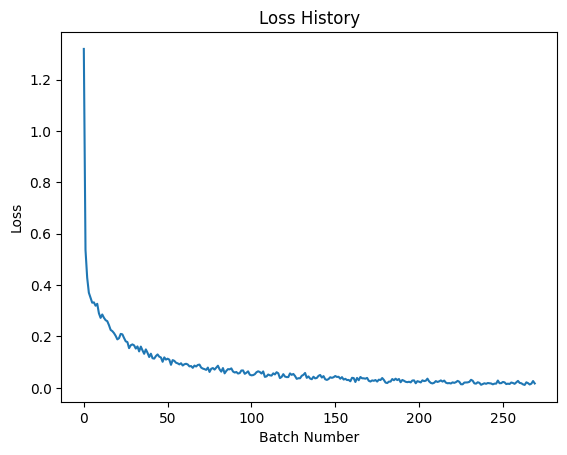

In [8]:
import matplotlib.pyplot as plt
loss_history = []

model = CNN()

if torch.cuda.is_available():
    model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

for epoch in range(30): 
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            current_loss = running_loss / 100
            loss_history.append(current_loss)    
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {current_loss:.4f}')
            running_loss = 0.0

plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.show()

In [9]:
incorrect_images = []
incorrect_labels = []
predicted_labels = []
total = 0
correct = 0

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        mask = (predicted != labels)
        incorrect_images.extend(images[mask])
        incorrect_labels.extend(labels[mask])
        predicted_labels.extend(predicted[mask])

print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')


Accuracy of the network on the test images: 97.57%


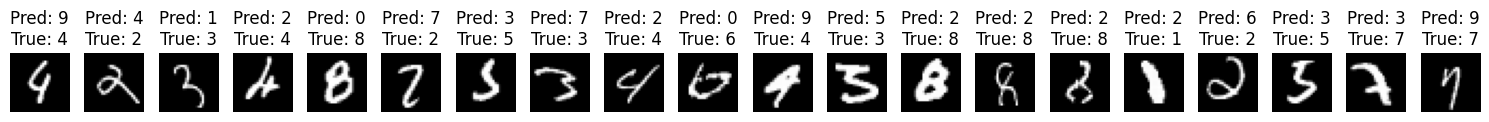

In [10]:
import matplotlib.pyplot as plt

num_images_to_show = 20 

fig, axes = plt.subplots(nrows=1, ncols=num_images_to_show, figsize=(15, 3))

for idx, ax in enumerate(axes):
    if idx < len(incorrect_images):
        image = incorrect_images[idx].cpu().numpy().squeeze() 
        true_label = incorrect_labels[idx].cpu().item()
        pred_label = predicted_labels[idx].cpu().item()

        ax.imshow(image, cmap='gray')
        ax.set_title(f'Pred: {pred_label}\nTrue: {true_label}')
        ax.axis('off')
    else:
        ax.axis('off')  

plt.tight_layout()
plt.show()
